# 분류 모델 - LDA, QDA 모델 
- 확률론적 생성 모형으로 베이즈 정리를 사용하여 조건부 확률값을 구하고 가장 큰 값을 선정한다.
- 베이즈 정리의 가능도를 다변수 정규 분포라고 가정한다.
- QDA는 다변수 정규 분포의 공분산 행렬을 여러가지로 갖지만, LDA는 한개의 공분산 행렬을 갖는다.
- QDA는 2차 곡선 형태의 결정경계면을 나타내고, LDA는 직선 형태의 결정경계면을 나타낸다.

** 정의 **
- 확률론적 생성 모형
   - LDA : Linear Discriminant Analysis
   - QDA : Quadratic Discriminant Analysis
- 가능도(likelihood estimate)를 먼저 구한 후 베이즈 정리를 사용하여 조건부 확률을 계산

** 생성모형 **
- 생성모형은 베이즈 정리를 사용하여 조건부확률 p(y=k|x)를 계산한다.
   - 분류문제 자체의 의미가 조건부확률과 같다.
   - 어떤 새로운 표본 데이터 x가 주어졌을때 y 종속값이 k일 확률
- 가장 큰 값을 선택하면 되므로 항상 값이 같은 분모 P(x)는 굳이 계산하지 않아도 된다. 
   - 무조건부 확률이고, 전체확률의 법칙으로 계산한다.
   - 분모를 빼면 : P(y=k|x)는 P(x|y=k)P(y=k)를 따른다.
- 베이즈 정리의 사전확률 P(y=k)는 y=k이 데이터의 수를 모든 데이터의 수로 나누어 계산한다.
   -  다른 사전확률 정보가 있으면 그것을 사용해도 된다.
- 베이즈 정리의 가장 중요한 부분인 가능도(y에 대한 x의 조건부 확률)의 계산
   - P(x|y=k)가 특정한 확률분포 모형을 따른다고 가정한다. ---> 확률밀도함수의 형태를 가정한다.
   - k번째 클래스에 속한 학습 데이터 {x1, ..., xk}를 사용하여 이 모형의 모숫값을 구한다.
   - 모숫값을 구했으므로 가능도의 확률밀도 함수를 구한 것과 같다. 새로운 표본을 사용해서 가능도를 계산할 수 있다.

** QDA 이차판별분석법 **
- QDA는 가능도를 x가 실수이고 확률분포가 다변수 정규분포라고 가정한다.
   - y=k 일 때의 x의 분포에 대한 기대값과 공분산 행렬이 k 마다 다르다.
   - 따라서 베이즈 정리의 가능도에 이 식을 대입해서 정리하면 풀 수 있게 된다.
- sklearn
   - from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
   - qda.fit(X, y)
   - 모델의 속성값에 사전확률, k일때 x의 기대값, 공분산이 있다.
- 분류문제에 적용하면 이러한 확률분포에 따라서 곡선형태의 경계면이 만들어진다.

** LDA 선형판별분석법 **
- LDA는 가능도를 공통된 공분산 행렬을 가지는 다변수 정규분포 (multivariate gaussian normal distribution)이라고 가정한다.
- QDA의 다변수 정규분포 식에서 공분산 행렬이 k개가 아니라 한개가 된다.
- 계산식
   - 가능도는 다변수 정규분포이므로 로그변환하여 곱셈을 덧셈 형태로 바꾼다.
   - 식을 정리한 후 가능도를 베이즈 정리의 가능도와 분모(전체확률법칙) 식에 대입한다.
   - 조건부확률식 양변에 로그를 변환하여 정리하여 식을 정리한다.
   - 결과적으로 경계선이 직선인 판별함수를 구할 수 있다.
- 선형판별모형을 분류문제에 적용하면 이러한 특성에 따라서 직선형태의 경계면이 만들어진다.
- sklearn
   - from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
   - lda.fit(X, y)
   - 속성값으로 공분산 행렬을 반환하면 모든 k에 대해 공통된 공분산을 구할 수 있다.

** sklearn의 LDA/QDA **
- LDA는 선형 결정표면, QDA는 2차 결정표면을 갖는 고전적인 분류기이다.
- 다중 클래스 문제에서 잘 작동하는 것으로 입증 되었고, 조정할 하이퍼 매개변수가 없는 등 쉽게 계산할 수 있는 폐쇄형 솔루션을 갖고 있어서 사용하기 편하다.
- QDA가 더 유연한 모델이다. (곡선형태의 2차 결정경계면을 갖는다.)
- LDA는 클래스의 갯수보다 작은 차원으로 데이터를 반환하여 차원축소의 기능을 하기도 한다.
   - n_components 매개변수를 정할 수 있다.
   - PCA와 같은 기능
- LDA/QDA는 모두 조건부확률을 구하기 위한 베이즈 정리를 사용하며, 가능도 확률을 다변수 정규분포라고 가정한다.
- QDA 모델의 공분산 행렬이 대각선이라고 가정한다면, 결과값은 가우시안 나이브 베이즈 모델과 같다.
- LDA는 각 클래스 k에 대한 x의 가우시안 분포가 동일한 공분산 행렬이라고 가정한다. QDA의 특별한 경우이다.
- LDA는 shrinkage 매개변수를 사용할 수 있다.
   - shrinkage는 데이터의 특징값의 수보다 샘플의 수가 더 작을 떄 공분산 행렬의 추정을 개선하는데 사용 되는 정규화의 한 방법이다. (LDA는 공분산 행렬이 하나인 형태이다.)
   - 이러한 경우 shrinkage는 분류기의 성능을 향상 시켜주기도 한다.
   - shrinkage는 solver='lsqr' 이나 'eigen'으로 설정한 경우에 사용할 수 있다.   
   - shrinkage='auto' : Ledoit and Wolf의 보조정리에 따라서 이 값을 자동으로 결정한다.
      - shrinkage=0 이면 경험적 공분산 행렬이 사용된다.
      - shrinkage=1 이면 분산의 대각 행렬이 공분산 행렬의 추정치로 사용된다.
      - 0<shrinkage<1 로 놓으면 공분산 행렬의 축소 버전이 추정된다.
   - shrinkage='auto' 보다 sklearn.covarinace.OAS를 사용한 경우 shrinkage 값을 더 잘 추정할 수도 있다.
   - 즉 LDA는 공분산 행렬을 추정하기 위해서 shrinkage라는 매개변수를 사용할 수 있고, 0~1 사이의 어떤 값을 추정하여 공분산 행렬을 결정한다. 'auto', 0, 1, 0~1 사이의 실수를 설정할 수 있다. 다만 데이터가 정규분포를 따르는 경우 OAS 추정기를 LDA와 함께 사용하면 shrinkage 값을 더 정확하게 찾을 수 있다.
- solver
   - svd : singular vector decomposition : 특잇값 분해 : 정방행렬이 아닌 행렬A를 특이분해를 통해서 3개의 행렬의 곱으로 나타낼 수 있다. 
      - 'svd' : LDA의 기본 솔버, QDA의 솔버로도 사용할 수 있다. 공분산 행렬의 계산에 의존하지 않으므로 특징값의 수가 많은 경우 적합할 수 있다.
      - solver='svd'는 shrinkage 매개변수와 함께 사용할 수 없다.
   - solver='lsqr' 은 분류에만 작동하는 알고리즘이다. shrinkage 나 공분산 추정기를 지원한다.
   - solver='eigen'은 클래스 분산 간의 비율과 클래스 분산 비율 내 최적화를 기반으로 한다. shrinkage를 지원한다. 공분산 행렬을 계산해야하므로 특징값의 수가 많은 경우 적합하지 않다.

** OAS와 LDA의 shrinkage 를 사용한 분류 성능 테스트 **
- LDA 모델의 shrinkage 매개변수 값을 달리 할 때 성능이 어떻게 달라지는 테스트
   - shrinkage='auto' : Ledoit-Wolf 추정방식으로 shrinkage 값을 추정하고, 공분산 행렬을 추정
   - shrinkage=None
   - covariance_estimator=oas : OAS 추정기를 사용하여 공분산행렬을 추정
      - oas = OAS()
- OAS 공분산 행렬 추정기를 사용한 경우가 가장 성능이 좋은 것으로 나타난다.
   - OAS > auto > none

## LDA의 공분산 행렬 추정 방법에 따른 성능 비교
- shrinkage 매개변수는 LDA 모델의 공분산 행렬을 추정하는 값으로, 특징값의 갯수가 데이터 샘플의 수보다 더 많을 때 유용하게 사용 된다.
   - "auto", 0~1 사이의 실수
- LDA 모델에 OAS 모델을 사용할 수 있다.
   - OAS 모델은 공분산 행렬 추정기이다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_train = 20
n_test = 200
n_averages = 50
n_features_max = 75
step = 4

In [5]:
def generate_data(n_samples, n_features) : 
    
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    if n_features > 1 :
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    
    return X, y

In [6]:
from sklearn.covariance import OAS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range : 
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages) : 
        X, y = generate_data(n_train, n_features)
        
        clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto").fit(X, y)
        oas = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver="lsqr",
                                          covariance_estimator=oas).fit(X, y)
        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)
        
    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

In [32]:
len(list(n_features_range)), list(n_features_range)

(19, [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73])

In [33]:
score_clf1, score_clf2, score_clf3

(25.075, 44.949999999999996, 46.09)

In [34]:
features_sample_ratio = np.array(n_features_range) / n_train
features_sample_ratio

array([0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45, 1.65, 1.85, 2.05,
       2.25, 2.45, 2.65, 2.85, 3.05, 3.25, 3.45, 3.65])

## 테스트 결과
- 특징값의 갯수가 증가하면서 shrinkage를 사용하지 않은 LDA 모델의 성능이 현저하게 떨어진다.
   - n_features / n_samples > 1.0
- LDA 모델의 매개변수 covariance_estimator=oas 를 사용한 경우 가장 성능이 안정적으로 나온다.
- LDA + OAS > LDA shrinkage="auto" > LDA shrinkage=None

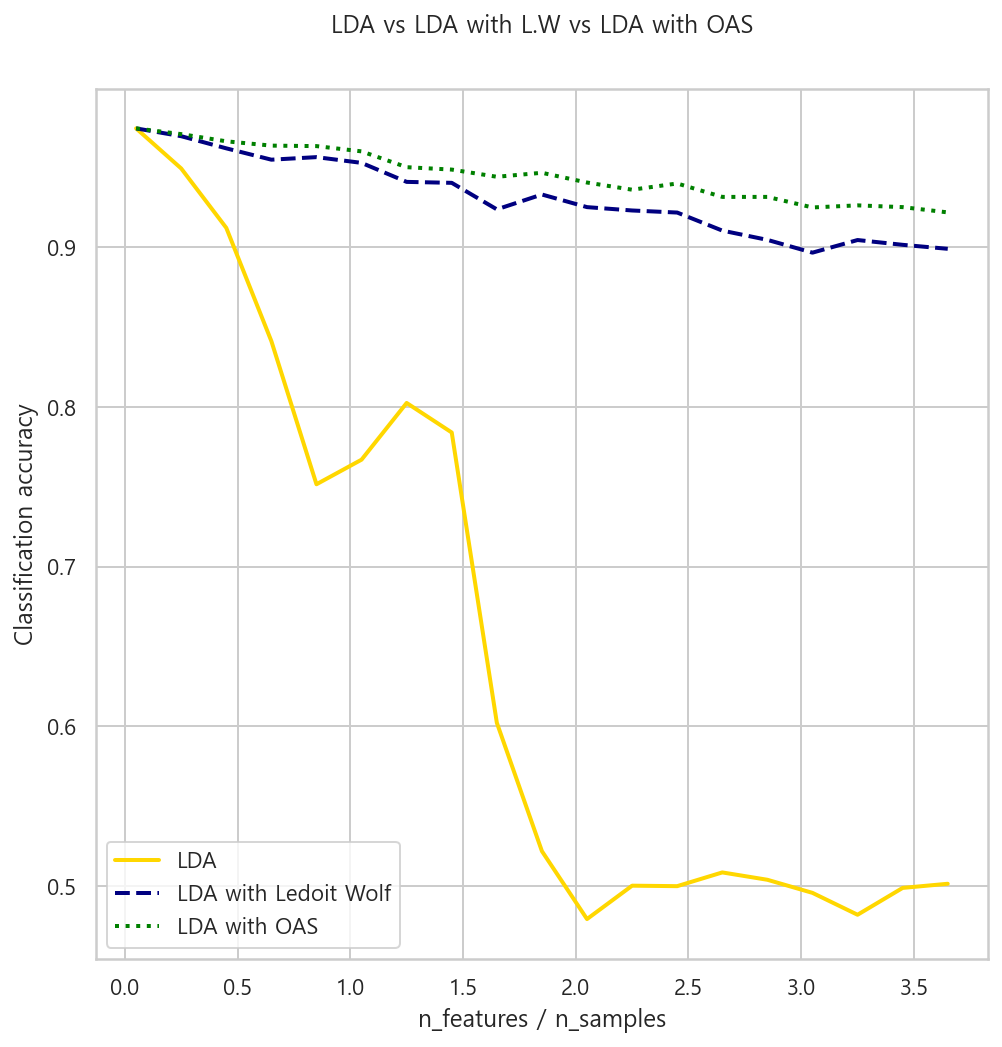

In [35]:
plt.figure(figsize=(8, 8))

plt.plot(features_sample_ratio, acc_clf1, 
         linewidth=2, label="LDA", color="gold", linestyle="-")

plt.plot(features_sample_ratio, acc_clf2, 
         linewidth=2, label="LDA with Ledoit Wolf", color="navy", linestyle="--")

plt.plot(features_sample_ratio, acc_clf3, 
         linewidth=2, label="LDA with OAS", color="green", linestyle=":")

plt.title("LDA vs LDA with L.W vs LDA with OAS", y=1.05)
plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")
plt.legend(loc="lower left")
plt.show() ; 

## iris data test
- LDA/QDA
- 시간, 성능, roc_curve, classification_report

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [3]:
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

In [6]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X, y)

lda_score = lda_clf.score(X, y)

print("LDA score : ", lda_score)

LDA score :  0.98


In [7]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X, y)

qda_score = qda_clf.score(X, y)

print("QDA score : ", qda_score)

QDA score :  0.98


In [27]:
from sklearn.metrics import (classification_report, roc_curve)

In [28]:
lda_pred = lda_clf.predict(X)

print(classification_report(y, lda_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [29]:
qda_pred = qda_clf.predict(X)

print(classification_report(y, qda_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [30]:
from sklearn.preprocessing import label_binarize

In [31]:
bin_y = label_binarize(y, classes=(0, 1, 2))
bin_y.shape

(150, 3)

In [34]:
%matplotlib inline

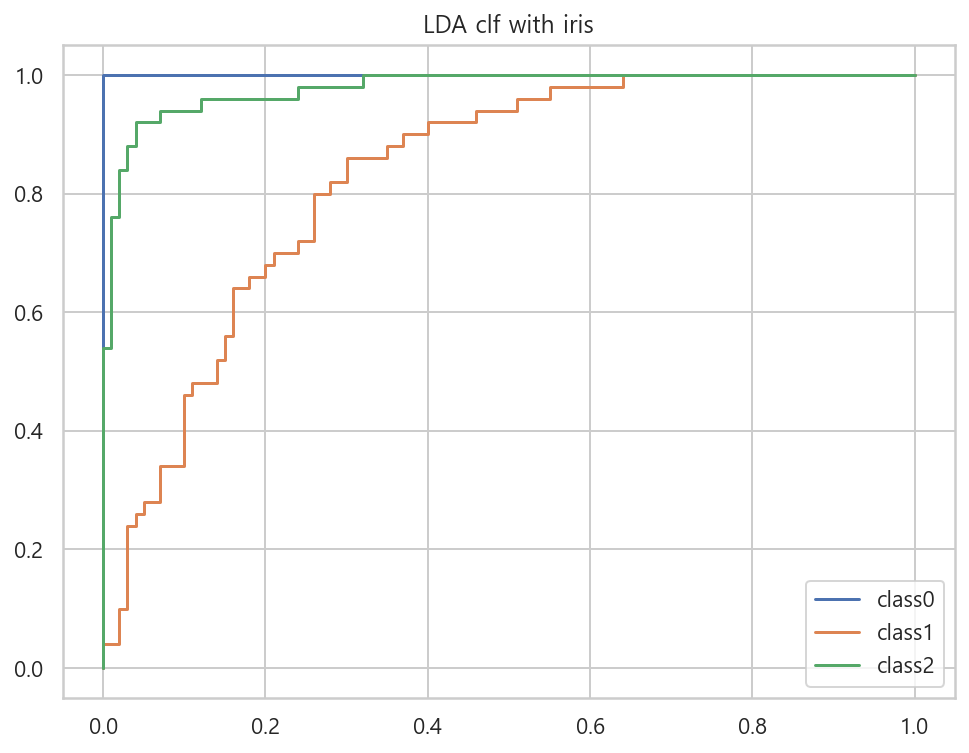

In [39]:
plt.figure(figsize=(8, 6))

for i in range(3) : 
    model = LinearDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("LDA clf with iris")
plt.legend()
plt.show() ; 

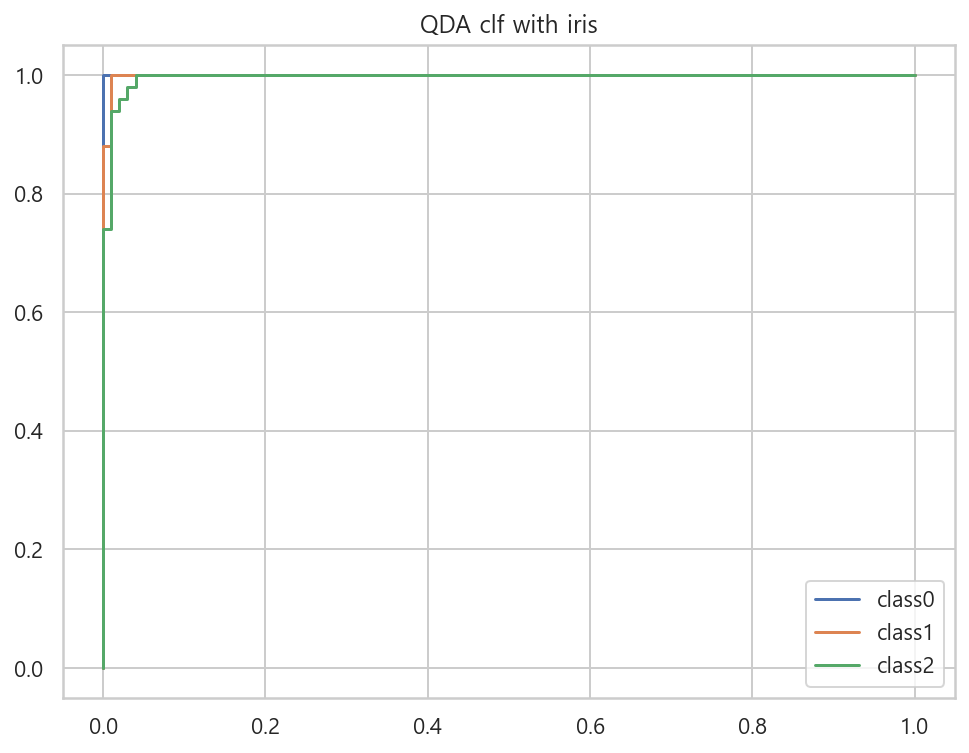

In [40]:
plt.figure(figsize=(8, 6))

for i in range(3) : 
    model = QuadraticDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("QDA clf with iris")
plt.legend()
plt.show() ; 

## wine_data

In [43]:
from sklearn.datasets import load_wine

In [44]:
wine = load_wine()
X = wine.data
y = wine.target

In [45]:
X.shape, y.shape

((178, 13), (178,))

In [48]:
df_X = pd.DataFrame(X, columns=wine.feature_names)
df_X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [54]:
df_y = pd.DataFrame(y, columns=["target"])
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [55]:
df = pd.concat([df_X, df_y], axis=1)
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

In [61]:
ss = StandardScaler()
ss.fit(X)
ss_X = ss.transform(X)
df_X_ss = pd.DataFrame(ss_X, columns=wine.feature_names)
df_X_ss.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


In [67]:
X_train, X_test, y_train, y_test = train_test_split(ss_X, y, test_size=0.3, stratify=y, random_state=42)

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([18, 21, 15], dtype=int64))

In [76]:
from sklearn.metrics import classification_report

In [77]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred = lda_clf.predict(X_test)

print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [85]:
from sklearn.model_selection import cross_val_score

In [88]:
cv_acc = cross_val_score(lda_clf, X, y, scoring="accuracy", cv=5)
print(cv_acc.mean())

0.9717460317460318


In [79]:
from sklearn.preprocessing import label_binarize

In [80]:
bin_y = label_binarize(y, classes=(0, 1, 2))
bin_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

class0 roc_auc_score : 1.0
class1 roc_auc_score : 0.9929577464788732
class2 roc_auc_score : 1.0


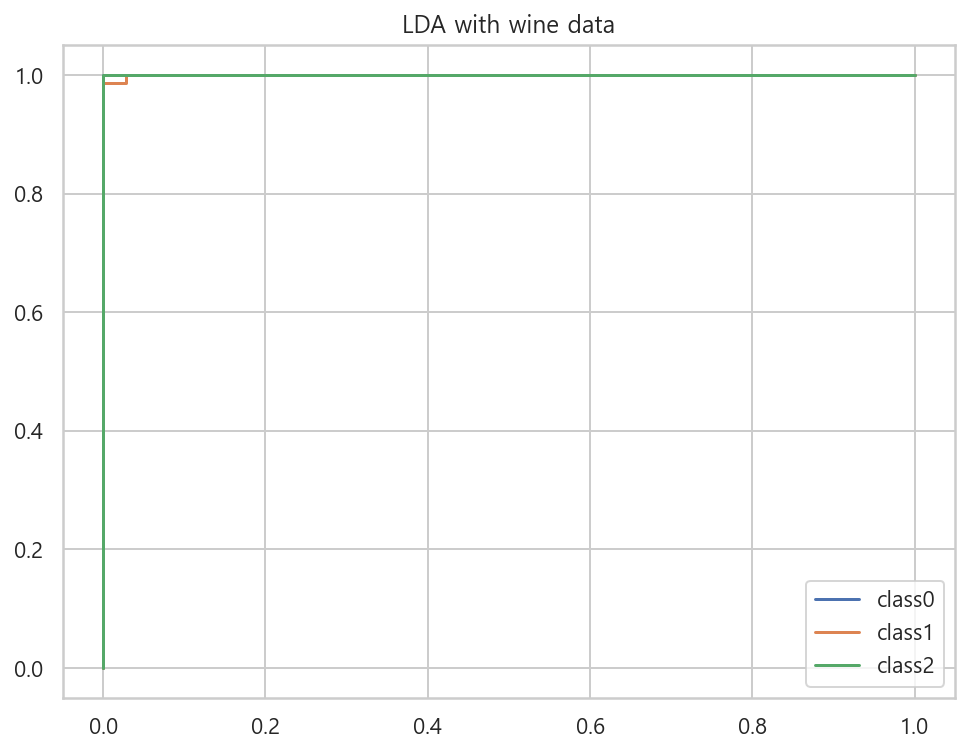

In [84]:
plt.figure(figsize=(8, 6))

for i in range(3) : 
    model = LinearDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    print(f"class{i} roc_auc_score : {roc_auc_score(bin_y[:, i], model.predict(X))}")
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("LDA with wine data")
plt.legend()
plt.show() ; 

In [90]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
qda_clf_pred = qda_clf.predict(X_test)

print(classification_report(y_test, qda_clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [91]:
cv_acc = cross_val_score(qda_clf, X, y, scoring="accuracy", cv=5)
print(cv_acc.mean())

0.9550793650793651


class0 roc_auc_score : 0.9957983193277311
class1 roc_auc_score : 1.0
class2 roc_auc_score : 1.0


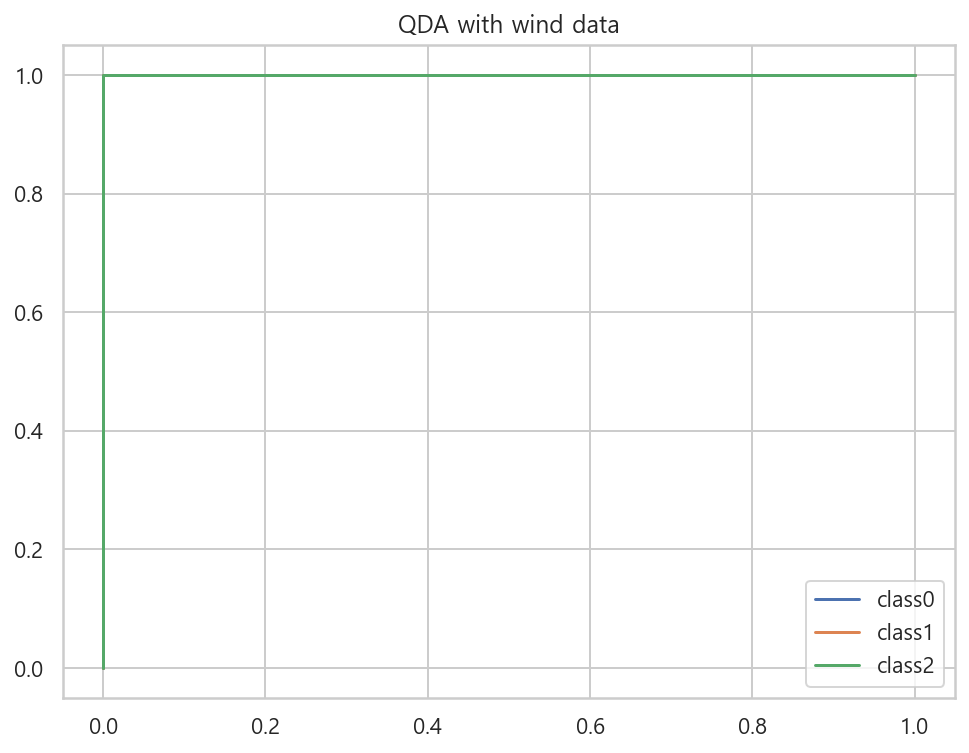

In [134]:
plt.figure(figsize=(8, 6))

for i in range(3) : 
    model = QuadraticDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    print(f"class{i} roc_auc_score : {roc_auc_score(bin_y[:, i], model.predict(X))}")
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("QDA with wind data")
plt.legend()
plt.show() ; 

In [131]:
sample = np.array([15.34, 1.05, 3.22, 11.2, 118.0, 2.65, 3.12, 0.33, 1.98, 4.32, 1.09, 2.22, 1000.0]).reshape(1, -1)
sample.shape

(1, 13)

In [133]:
qda_clf.predict(sample), lda_clf.predict(sample)

(array([0]), array([0]))

In [146]:
lda_clf.priors_, qda_clf.priors_

(array([0.33064516, 0.40322581, 0.26612903]),
 array([0.33064516, 0.40322581, 0.26612903]))

In [144]:
lda_clf.means_

array([[ 0.90158263, -0.34943795,  0.30426781, -0.71843328,  0.4839506 ,
         0.85472247,  0.91458782, -0.48464976,  0.45610365,  0.22048741,
         0.41033099,  0.67352504,  1.16524326],
       [-0.9366001 , -0.33550009, -0.48878069,  0.30901013, -0.32309181,
        -0.06651656,  0.01759988, -0.08907045,  0.21252977, -0.90722465,
         0.44518572,  0.26909099, -0.68668276],
       [ 0.09132002,  0.77608435,  0.32066687,  0.62028737, -0.03291923,
        -0.97347506, -1.24661936,  0.6809628 , -0.7921365 ,  0.99691694,
        -1.24784308, -1.30097189, -0.39009831]])

In [147]:
qda_clf.means_

array([[ 0.90158263, -0.34943795,  0.30426781, -0.71843328,  0.4839506 ,
         0.85472247,  0.91458782, -0.48464976,  0.45610365,  0.22048741,
         0.41033099,  0.67352504,  1.16524326],
       [-0.9366001 , -0.33550009, -0.48878069,  0.30901013, -0.32309181,
        -0.06651656,  0.01759988, -0.08907045,  0.21252977, -0.90722465,
         0.44518572,  0.26909099, -0.68668276],
       [ 0.09132002,  0.77608435,  0.32066687,  0.62028737, -0.03291923,
        -0.97347506, -1.24661936,  0.6809628 , -0.7921365 ,  0.99691694,
        -1.24784308, -1.30097189, -0.39009831]])

## digit data

In [149]:
from sklearn.datasets import load_digits

In [150]:
digits = load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [161]:
digits.target.shape

(1797,)

In [162]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

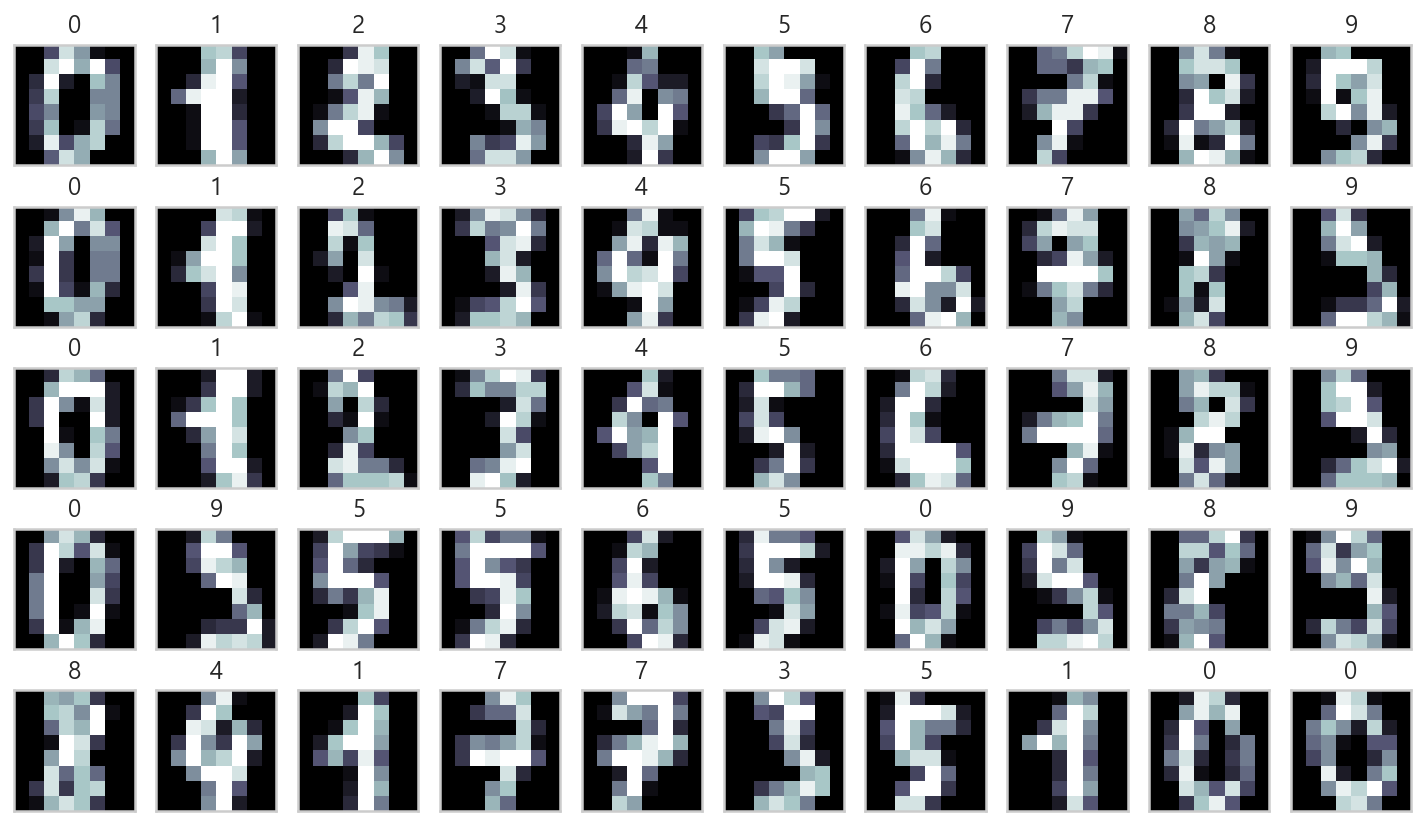

In [199]:
N = 5
M = 10

fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N) : 
    for j in range(M) :
        step = i * M + j
        plt.subplot(N, M, step+1)
        plt.imshow(digits.images[step], cmap=plt.cm.bone, interpolation="none")
        plt.xticks([]) ; plt.yticks([]) ; plt.grid(False)
        plt.title(digits.target_names[digits.target[step]])
        
plt.tight_layout()
plt.show() ; 

In [200]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X, y)

print("LDA clf score : ", lda_clf.score(X, y))

LDA clf score :  0.9638286032276016


In [201]:
lda_cv_acc = cross_val_score(lda_clf, X, y, scoring="accuracy", cv=5)

print(lda_cv_acc.mean())

0.9081832250077376


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

lda_pred = lda_clf.predict(X_test)
acc = accuracy_score(y_test, lda_pred)

print("acc : ", acc)
print(classification_report(y_test, lda_pred))

acc :  0.95
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.92      0.90        36
           2       1.00      1.00      1.00        35
           3       0.97      0.95      0.96        37
           4       1.00      0.97      0.99        36
           5       0.97      0.95      0.96        37
           6       0.95      0.97      0.96        36
           7       0.95      1.00      0.97        36
           8       0.89      0.91      0.90        35
           9       0.89      0.86      0.87        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



class0 / auc : 1.000
class1 / auc : 0.995
class2 / auc : 0.999
class3 / auc : 0.994
class4 / auc : 0.996
class5 / auc : 0.998
class6 / auc : 0.997
class7 / auc : 0.997
class8 / auc : 0.977
class9 / auc : 0.989


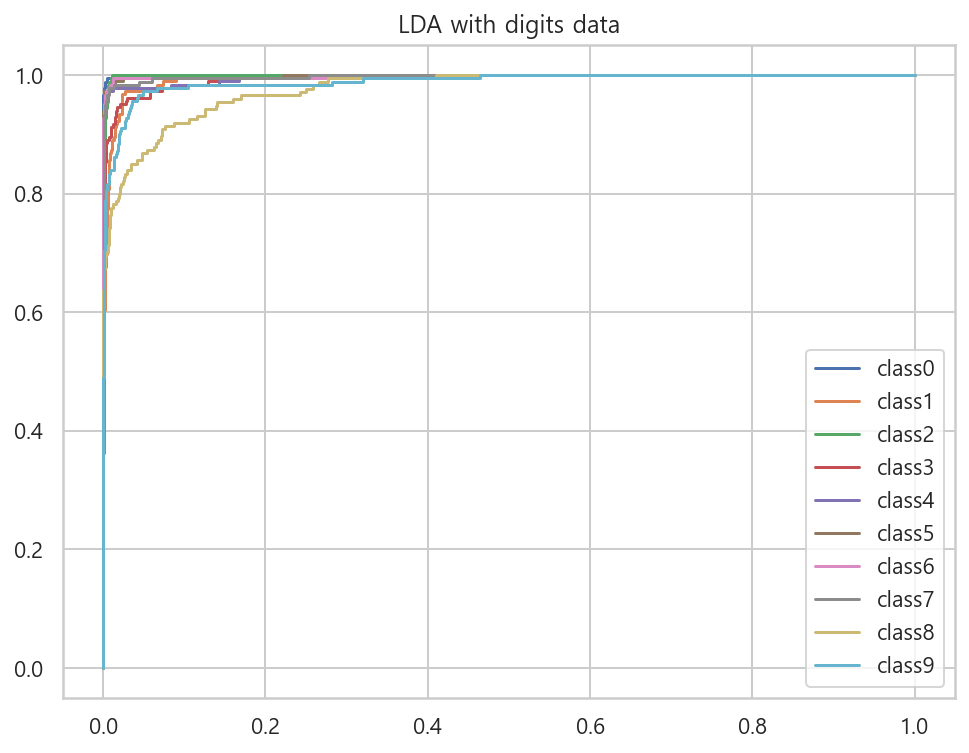

In [215]:
bin_y = label_binarize(y, classes=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

plt.figure(figsize=(8, 6))
for i in range(10) : 
    model = LinearDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    roc_auc = roc_auc_score(bin_y[:, i], model.predict_proba(X)[:, 1])
    print("class{} / auc : {:.3f}".format(i, roc_auc))
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("LDA with digits data")    
plt.legend()
plt.show() ; 

In [219]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X, y)

print("QDA score : ", qda_clf.score(X, y))

QDA score :  0.9449081803005008


In [221]:
cv_acc = cross_val_score(qda_clf, X, y, scoring="accuracy", cv=5)
print("cv acc : ", cv_acc.mean())

cv acc :  0.8180052615289384


In [218]:
qda_clf.fit(X_train, y_train)
qda_pred = qda_clf.predict(X_test)

qda_acc = accuracy_score(y_test, qda_pred)

print("acc : ", qda_acc)
print(classification_report(y_test, qda_pred))

acc :  0.7555555555555555
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.97      0.83      0.90        36
           2       0.93      0.74      0.83        35
           3       1.00      0.03      0.05        37
           4       0.97      0.81      0.88        36
           5       0.69      0.97      0.81        37
           6       1.00      0.97      0.99        36
           7       0.75      1.00      0.86        36
           8       0.38      0.94      0.54        35
           9       0.94      0.44      0.60        36

    accuracy                           0.76       360
   macro avg       0.86      0.76      0.74       360
weighted avg       0.86      0.76      0.73       360



class0 / auc : 0.996
class1 / auc : 0.906
class2 / auc : 0.970
class3 / auc : 0.831
class4 / auc : 0.975
class5 / auc : 0.750
class6 / auc : 0.965
class7 / auc : 0.911
class8 / auc : 0.768
class9 / auc : 0.851


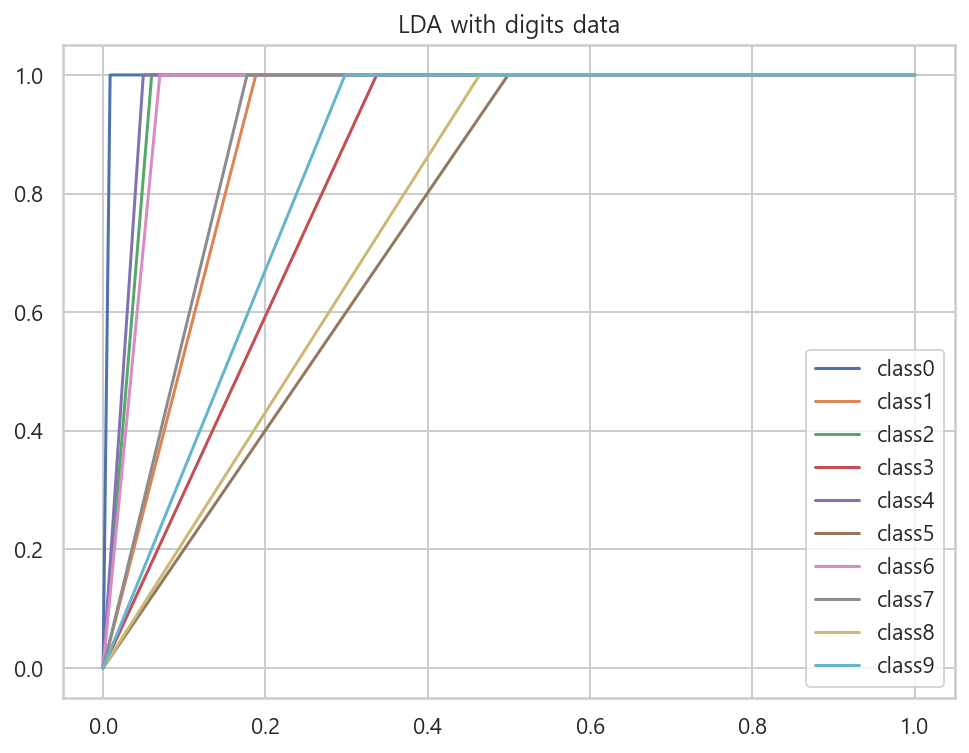

In [224]:
bin_y = label_binarize(y, classes=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

plt.figure(figsize=(8, 6))
for i in range(10) : 
    model = QuadraticDiscriminantAnalysis().fit(X, bin_y[:, i])
    fpr, tpr, thr = roc_curve(bin_y[:, i], model.predict_proba(X)[:, 1])
    roc_auc = roc_auc_score(bin_y[:, i], model.predict_proba(X)[:, 1])
    print("class{} / auc : {:.3f}".format(i, roc_auc))
    plt.plot(fpr, tpr, label="class{}".format(i))
    
plt.title("LDA with digits data")    
plt.legend()
plt.show() ; 